# ML_project 1_Maktabkhoone


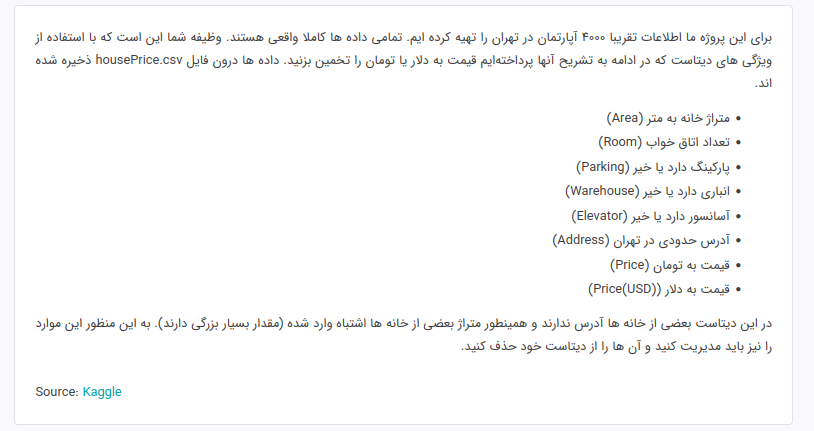

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

## reading data

In [2]:
df= pd.read_csv('1632300362534233.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


## Data Exploration

In [3]:
df.describe(), df.shape

(              Room         Price    Price(USD)
 count  3479.000000  3.479000e+03  3.479000e+03
 mean      2.079908  5.359023e+09  1.786341e+05
 std       0.758275  8.099935e+09  2.699978e+05
 min       0.000000  3.600000e+06  1.200000e+02
 25%       2.000000  1.418250e+09  4.727500e+04
 50%       2.000000  2.900000e+09  9.666667e+04
 75%       2.000000  6.000000e+09  2.000000e+05
 max       5.000000  9.240000e+10  3.080000e+06,
 (3479, 8))

In [4]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [5]:
df=df.dropna()

In [6]:
df.shape

(3456, 8)

In [7]:
df=df.convert_dtypes()

In [8]:
df.dtypes

Area           string
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

In [9]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [10]:
df=df.dropna()

In [11]:
df.shape

(3450, 8)

In [12]:
df.dtypes

Area          float64
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

In [13]:
df=df.convert_dtypes()

In [14]:
df.dtypes

Area            Int64
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

In [15]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3450.000000,3450.000000,3450,3450,3450,3.450000e+03,3.450000e+03
unique,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,True,True,True,NaN,NaN
freq,NaN,NaN,2924,3157,2717,NaN,NaN
mean,106.917391,2.081159,NaN,NaN,NaN,5.375563e+09,1.791854e+05
std,69.550976,0.760216,NaN,NaN,NaN,8.125918e+09,2.708639e+05
min,30.000000,0.000000,NaN,NaN,NaN,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,NaN,NaN,NaN,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,NaN,NaN,NaN,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,NaN,NaN,NaN,6.000000e+09,2.000000e+05


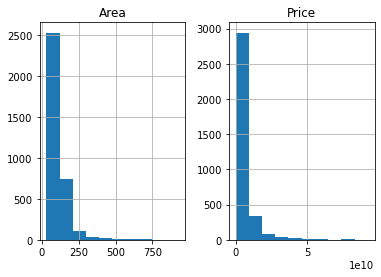

In [16]:
viz = df[['Area', 'Price']]
viz.hist()
plt.show()

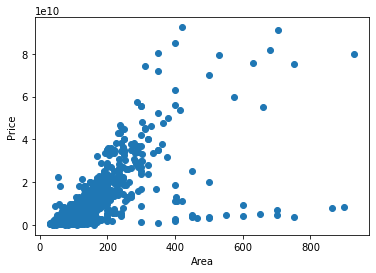

In [17]:
plt.scatter(df.Area, df.Price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [18]:
df.isnull().values.any()

False

## Data Preparation

### Normalize

In [19]:
#Normaliztion
def normalize(df,feature_name):
    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [20]:
df=normalize(df,'Price')

In [21]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3450.000000,3450.000000,3450,3450,3450,3450.000000,3.450000e+03
unique,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,True,True,True,NaN,NaN
freq,NaN,NaN,2924,3157,2717,NaN,NaN
mean,106.917391,2.081159,NaN,NaN,NaN,0.058140,1.791854e+05
std,69.550976,0.760216,NaN,NaN,NaN,0.087946,2.708639e+05
min,30.000000,0.000000,NaN,NaN,NaN,0.000000,1.200000e+02
25%,69.000000,2.000000,NaN,NaN,NaN,0.015321,4.730833e+04
50%,90.000000,2.000000,NaN,NaN,NaN,0.031348,9.666667e+04
75%,120.000000,2.000000,NaN,NaN,NaN,0.064899,2.000000e+05


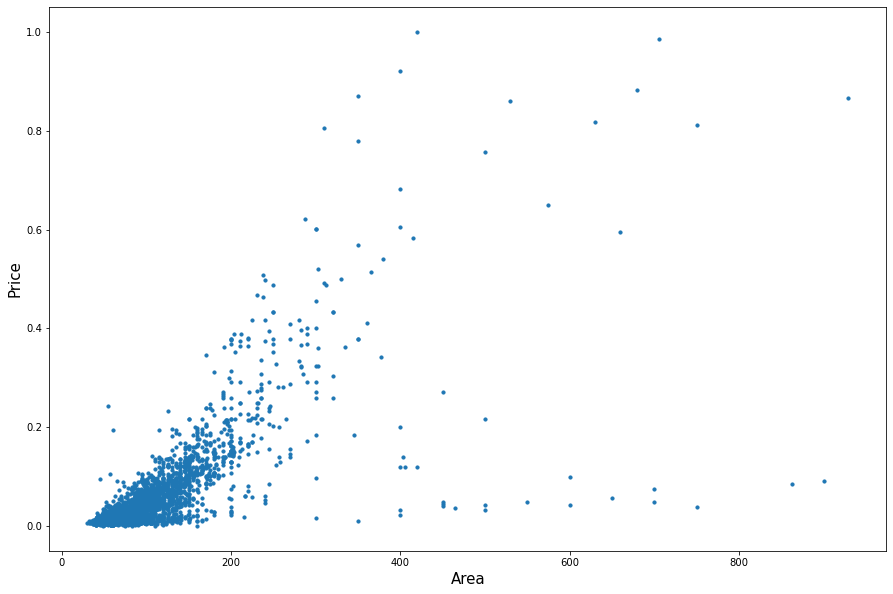

In [22]:
f = plt.figure(figsize=(15,10))
plt.scatter(df.Area, df.Price, s=10)
plt.xlabel('Area',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
  

In [23]:
df=normalize(df,'Area')

In [24]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3450.000000,3450.000000,3450,3450,3450,3450.000000,3.450000e+03
unique,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,True,True,True,NaN,NaN
freq,NaN,NaN,2924,3157,2717,NaN,NaN
mean,0.085559,2.081159,NaN,NaN,NaN,0.058140,1.791854e+05
std,0.077365,0.760216,NaN,NaN,NaN,0.087946,2.708639e+05
min,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.200000e+02
25%,0.043382,2.000000,NaN,NaN,NaN,0.015321,4.730833e+04
50%,0.066741,2.000000,NaN,NaN,NaN,0.031348,9.666667e+04
75%,0.100111,2.000000,NaN,NaN,NaN,0.064899,2.000000e+05


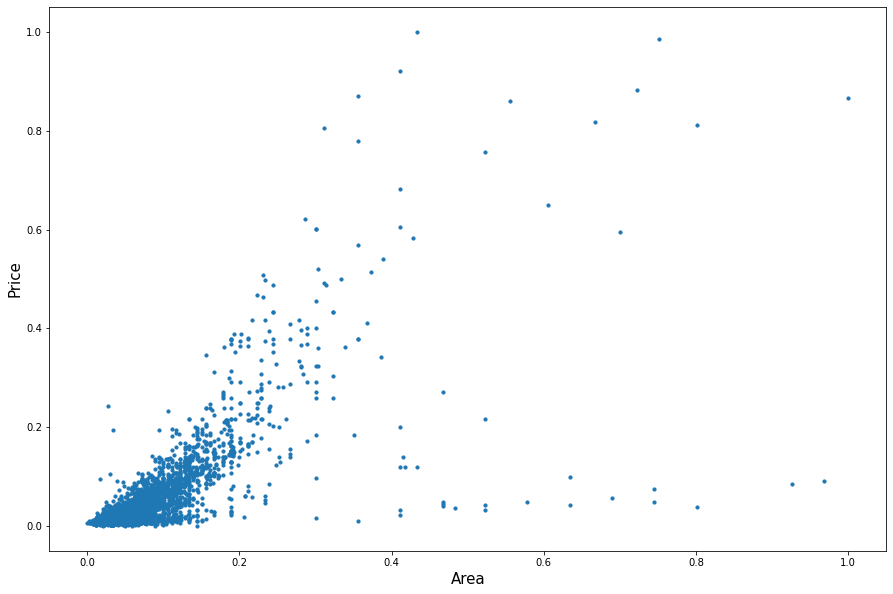

In [25]:
f = plt.figure(figsize=(15,10))
plt.scatter(df.Area, df.Price, s=10)
plt.xlabel('Area',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

<AxesSubplot:>

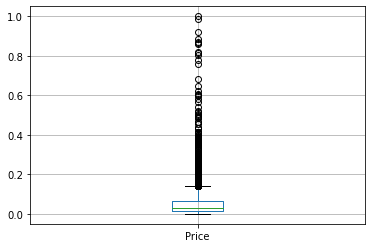

In [26]:
df.boxplot('Price',figsize=(6,4))

<AxesSubplot:>

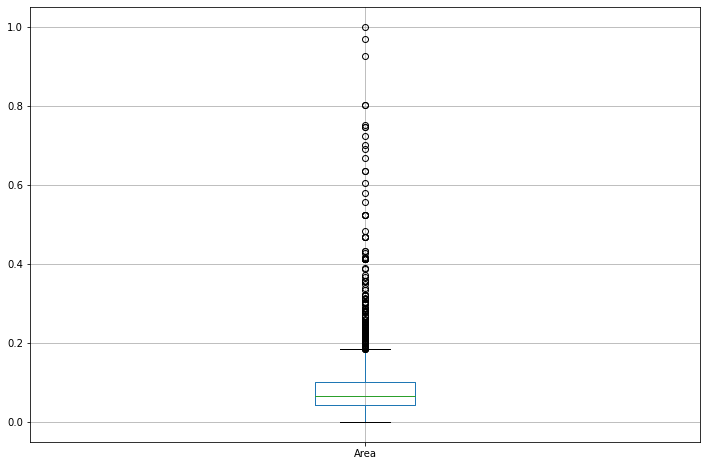

In [27]:
df.boxplot('Area',figsize=(12,8))

In [28]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
df=remove_outlier(df,'Price')

<AxesSubplot:>

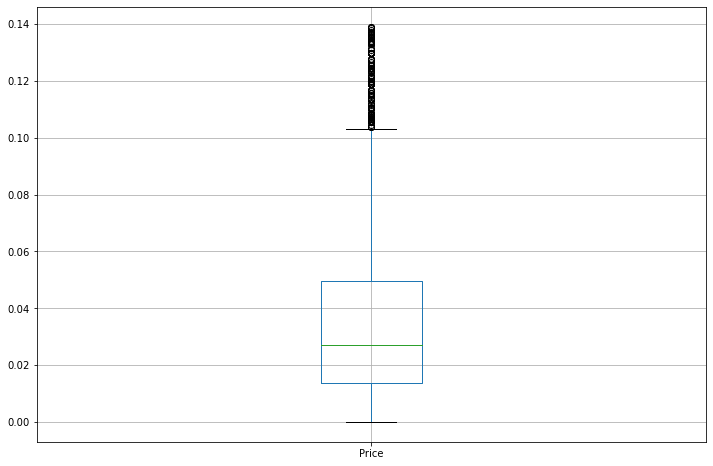

In [30]:
df.boxplot(column=['Price'],figsize=(12,8))

In [31]:
df=remove_outlier(df,'Area')

<AxesSubplot:>

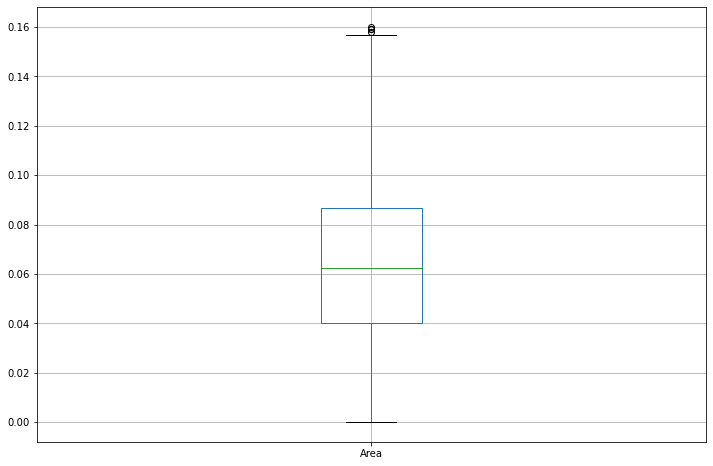

In [32]:
df.boxplot('Area',figsize=(12,8))

### *The latter boxplots use newer quantile data after removing outliers, leading to show unreal outliers in the above figures

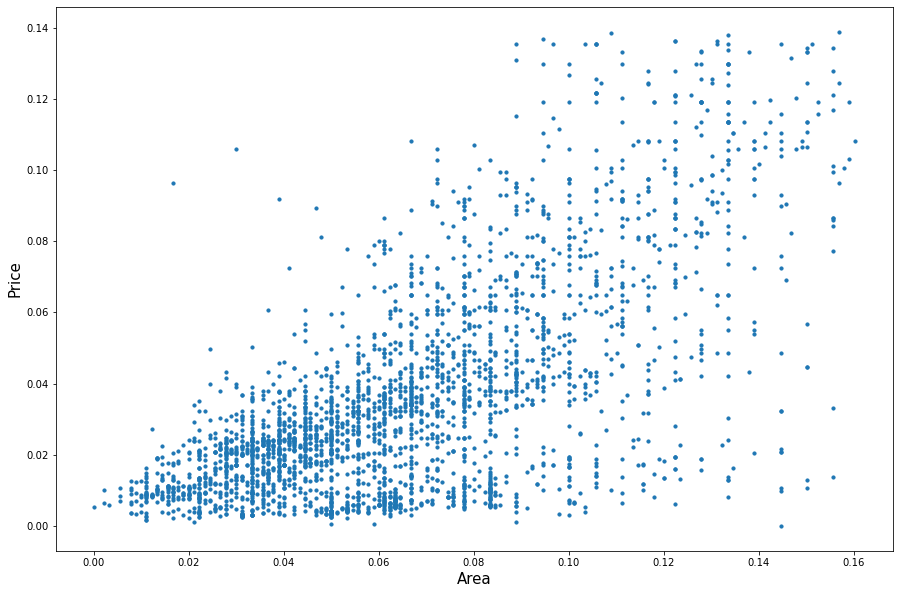

In [33]:
f = plt.figure(figsize=(15,10))
plt.scatter(df.Area, df.Price, s=10)
plt.xlabel('Area',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
  

### checked until this line

## Modelling

In [34]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

### Simple Regression Model

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.61131708]]
Intercept:  [-0.00452871]


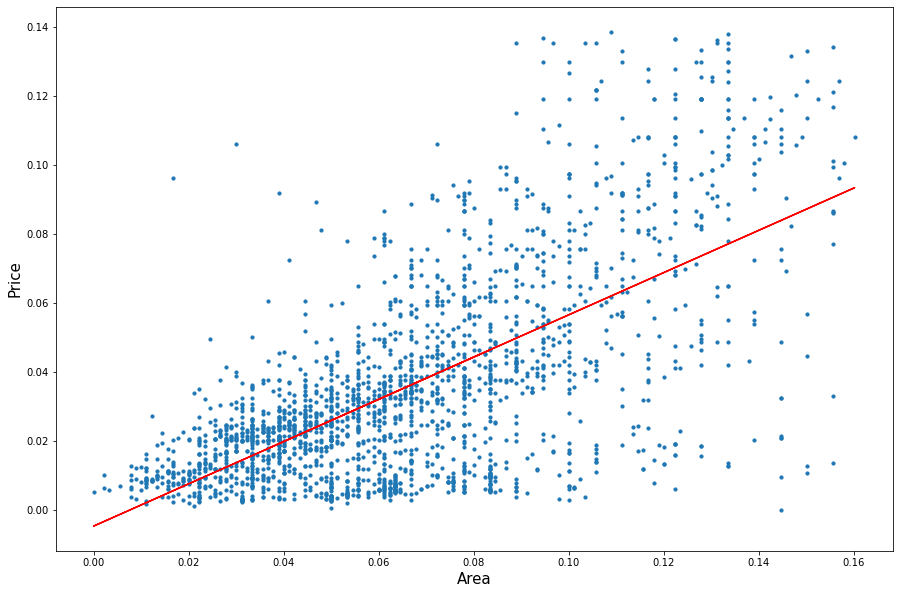

In [36]:
f = plt.figure(figsize=(15,10))
plt.scatter(train.Area, train.Price, s=10)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Area',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
  

In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.49


## degree=2

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.        , 0.03670745, 0.00134744],
       [1.        , 0.05450501, 0.0029708 ],
       [1.        , 0.07230256, 0.00522766],
       ...,
       [1.        , 0.05895439, 0.00347562],
       [1.        , 0.05005562, 0.00250556],
       [1.        , 0.08342603, 0.0069599 ]])

In [39]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.         0.24291681 2.44358969]]
Intercept:  [0.00655476]


Text(0, 0.5, 'Price')

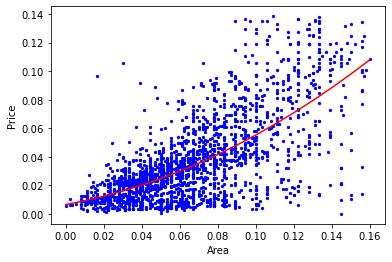

In [40]:
plt.scatter(train.Area, train.Price, s=5,  color='blue')
XX = np.arange(0.0, 0.165, 0.01)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("Price")

In [41]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.51
